# Предобработка
Выполнила: Остапчук Таисия Сергеевна, 121-ПМо

In [126]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
df = pd.read_csv('magnitogorsk_parsing.csv')

Посмотрим на имеющуюся табличку

In [128]:
df.sample(10)

,Unnamed: 0,Ссылка,Цена,Район,Адрес,Этаж,Высота потолка,Планировка,Площадь,Состояние квартиры,Кол-во комнат,Описание
188,23257000,/realty/prodazha-kvartir/prodam-kvartiru-23257...,4602300р. (115000р./м2)Подать заявку на ипотеку,NaN,"Карла Маркса, 27",1/4,NaN,NaN,"общая 40,02 м2, жилая 17,43 м2, кухни 11,79 м2",NaN,Однокомнатная,id:45482. \nНЕСТАНДАРТНАЯ ПЛАНИРОВКА ОДНОКОМНА...
67,23700110,/realty/prodazha-kvartir/prodam-kvartiru-23700...,11000000р. (109562р./м2)Подать заявку на ипотеку,NaN,"Зеленый Лог, 61Б/2",2/2,NaN,NaN,"общая 100,4 м2, жилая 70 м2, кухни 24 м2",NaN,Четырехкомнатная,"id:47233. \nКвартира площадью 100,4 м2 с земел..."
420,17664446,/realty/prodazha-kvartir/prodam-kvartiru-ordzh...,3750000р. (76844р./м2)Подать заявку на ипотеку,Орджоникидзевский,"Советская, 187/1",1/5,NaN,NaN,"общая 48,8 м2, жилая 0 м2, кухни 7 м2",NaN,Двухкомнатная,"<p>Представляю Вашeму вниманию cветлую, уютную..."
475,16452357,/realty/prodazha-kvartir/prodam-kvartiru-pravo...,3860000р. (103485р./м2)Подать заявку на ипотеку,Правобережный,93,4/9,NaN,NaN,"общая 37,3 м2, жилая 15 м2, кухни 11 м2",NaN,Однокомнатная,【 Продаётся 】 <br />⠀⠀⠀Продам отличную квартир...
250,22889171,/realty/prodazha-kvartir/prodam-kvartiru-22889...,3478200р. (93000р./м2)Подать заявку на ипотеку,NaN,Западное шоссе,3/4,NaN,NaN,"общая 37,4 м2, жилая 16,7 м2, кухни 12 м2",NaN,Однокомнатная,id:42831. \nВ продаже однокомнатная квартира о...
381,18739278,/realty/prodazha-kvartir/prodam-kvartiru-ordzh...,2590000р. (51800р./м2)Подать заявку на ипотеку,Орджоникидзевский,"Сочинская, 47/1",2/3,NaN,NaN,"общая 50 м2, жилая 36 м2, кухни 12 м2",NaN,Двухкомнатная,"<b>Продам квартиру в посёлке Южный Посад</b>, ..."
344,19874331,/realty/prodazha-kvartir/prodam-kvartiru-19874...,9900000р. (68750р./м2)Подать заявку на ипотеку,NaN,"Галиуллина, 5/1",5/5,NaN,NaN,"общая 144 м2, жилая 103 м2, кухни 19 м2",NaN,Четырехкомнатная,id:39545. \nЕдинственная в своем роде кваpтиpa...
383,18685122,/realty/prodazha-kvartir/prodam-kvartiru-18685...,600000р. (14286р./м2)Подать заявку на ипотеку,NaN,"Заводская, 17",2/2,NaN,NaN,"общая 42 м2, жилая 30 м2, кухни 7 м2",NaN,Двухкомнатная,id:37986. \nBHИMАНИE! ЭКСКЛЮЗИВНOЕ ПPЕДЛOЖEНИЕ...
189,23256999,/realty/prodazha-kvartir/prodam-kvartiru-23256...,5966200р. (115000р./м2)Подать заявку на ипотеку,NaN,"Карла Маркса, 27",1/4,NaN,NaN,"общая 51,88 м2, жилая 32 м2, кухни 6 м2",NaN,Двухкомнатная,id:45479. \nНЕСТАНДАРТНАЯ ПЛАНИРОВКА ДВУХКОМНА...
132,23426913,/realty/prodazha-kvartir/prodam-kvartiru-23426...,4200000р. (68852р./м2)Подать заявку на ипотеку,NaN,"Советский переулок, 4",4/5,NaN,NaN,"общая 61 м2, жилая 44,6 м2, кухни 5,6 м2",NaN,Четырехкомнатная,id:46175. \nВНИМАНИЕ! ЭКСКЛЮЗИВНОЕ ПРЕДЛОЖЕНИЕ...


Сразу вернем название столбцу с id

In [129]:
df = df.rename(columns={'Unnamed: 0': 'id'})
display(df.head())

,id,Ссылка,Цена,Район,Адрес,Этаж,Высота потолка,Планировка,Площадь,Состояние квартиры,Кол-во комнат,Описание
0,23812769,/realty/prodazha-kvartir/prodam-kvartiru-23812...,2080000р. (63609р./м2)Подать заявку на ипотеку,NaN,"Ленина пр-т, 212б",1/1,NaN,NaN,"общая 32,7 м2, жилая 30 м2, кухни 0 м2",NaN,NaN,id:47638. \nПредставьте себе уединённый уголок...
1,23812768,/realty/prodazha-kvartir/prodam-kvartiru-23812...,2080000р. (65000р./м2)Подать заявку на ипотеку,NaN,"Ленина пр-т, 214",1/2,NaN,NaN,"общая 32 м2, жилая 20 м2, кухни 12 м2",NaN,Однокомнатная,id:47637. \nУстали от городского шума и суеты?...
2,23812767,/realty/prodazha-kvartir/prodam-kvartiru-23812...,1560000р. (65000р./м2)Подать заявку на ипотеку,NaN,NaN,1/2,NaN,NaN,"общая 24 м2, жилая 18 м2, кухни 5 м2",NaN,Однокомнатная,id:47636. \nУстали от городского шума и суеты?...
3,23812766,/realty/prodazha-kvartir/prodam-kvartiru-23812...,1250000р. (30488р./м2)Подать заявку на ипотеку,NaN,"Садовая, 18",2/2,NaN,NaN,"общая 41 м2, жилая 20 м2, кухни 7 м2",NaN,Однокомнатная,id:47633. \nПродам уютную 1-комнатную квартиру...
4,23812765,/realty/prodazha-kvartir/prodam-kvartiru-23812...,2770000р. (63532р./м2)Подать заявку на ипотеку,NaN,"Советская, 145/1",1/5,NaN,NaN,"общая 43,6 м2, жилая 30 м2, кухни 6 м2",NaN,Двухкомнатная,id:47626. \nПредставляем вашему вниманию уютну...


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  486 non-null    int64 
 1   Ссылка              486 non-null    object
 2   Цена                486 non-null    object
 3   Район               174 non-null    object
 4   Адрес               482 non-null    object
 5   Этаж                486 non-null    object
 6   Высота потолка      23 non-null     object
 7   Планировка          44 non-null     object
 8   Площадь             486 non-null    object
 9   Состояние квартиры  55 non-null     object
 10  Кол-во комнат       473 non-null    object
 11  Описание            485 non-null    object
dtypes: int64(1), object(11)
memory usage: 45.7+ KB


# Обработаем заголовки и разделим данные
Разделим площадь и информацию о этаже, оставим только обычную цену (без ипотеки), уберем столбцы, в которых практически отсутствуют данные

In [131]:
df['Общая площадь'] = df['Площадь'].str.extract(r'общая (\d+(?:,\d+)?) м2')
df['Жилая площадь'] = df['Площадь'].str.extract(r'жилая (\d+(?:,\d+)?) м2')
df['Площадь кухни'] = df['Площадь'].str.extract(r'кухни (\d+(?:,\d+)?) м2')
df['Цена, р.'] = df['Цена'].str.extract(r'(\d+)\s*р\.')

df['Общая площадь'] = df['Общая площадь'].str.replace(',', '.')
df['Жилая площадь'] = df['Жилая площадь'].str.replace(',', '.')
df['Площадь кухни'] = df['Площадь кухни'].str.replace(',', '.')
df['Цена, р.'] = df['Цена, р.'].str.replace(',', '.')

df['Общая площадь'] = pd.to_numeric(df['Общая площадь'], errors='coerce')
df['Жилая площадь'] = pd.to_numeric(df['Жилая площадь'], errors='coerce')
df['Площадь кухни'] = pd.to_numeric(df['Площадь кухни'], errors='coerce')
df['Цена, р.'] = pd.to_numeric(df['Цена, р.'], errors='coerce')

df['Этаж квартиры'] = df['Этаж'].str.extract(r'(\d+)/\d+').astype(int)
df['Этажей в доме'] = df['Этаж'].str.extract(r'\d+/(\d+)').astype(int)

df = df.drop(['Площадь', 'Высота потолка', 'Планировка', 'Состояние квартиры', 'Цена', 'Этаж'], axis=1)

In [132]:
df.sample(10)

,id,Ссылка,Район,Адрес,Кол-во комнат,Описание,Общая площадь,Жилая площадь,Площадь кухни,"Цена, р.",Этаж квартиры,Этажей в доме
46,21132477,/realty/prodazha-kvartir/prodam-kvartiru-lenin...,Ленинский,"Советская, 22",Однокомнатная,💥Квартира в доме новой постройки 2013 года. За...,40.5,18.0,9.0,2950000,2,9
61,23724731,/realty/prodazha-kvartir/prodam-kvartiru-23724...,NaN,"Суворова, 139",Трехкомнатная,id:47289. \nВаша новая жизнь начинается здесь!...,54.0,30.0,6.0,4500000,3,5
51,23737075,/realty/prodazha-kvartir/prodam-kvartiru-ordzh...,Орджоникидзевский,"Труда, 16",Однокомнатная,id:47375. \n&nbsp; &nbsp;Продаём 1-комнатную к...,22.0,14.0,5.0,1895000,1,9
469,16734970,/realty/prodazha-kvartir/prodam-kvartiru-ordzh...,Орджоникидзевский,"50-летия Магнитки, 47",Однокомнатная,Продам однокомнатную квартиру в Орджоникидзевс...,33.5,17.0,9.0,2980000,7,9
443,17340544,/realty/prodazha-kvartir/prodam-kvartiru-17340...,NaN,"Ленина пр-т, 214Б",Однокомнатная,id:34403. \nШикарные апартаменты в коттеджном ...,34.8,20.0,9.0,2500000,1,1
25,23773229,/realty/prodazha-kvartir/prodam-kvartiru-23773...,NaN,"Ленина пр-т, 192А",NaN,id:47451. \nПродажа квартир в ЖИЛОМ КОМПЛЕКСЕ ...,24.0,20.0,4.0,1560000,2,2
73,16127356,/realty/prodazha-kvartir/prodam-kvartiru-lenin...,Ленинский,"Герцена, 31",Трехкомнатная,Продам раздельную квартиру старой планировки. ...,75.0,53.0,8.5,4750000,1,4
393,17340740,/realty/prodazha-kvartir/prodam-kvartiru-17340...,NaN,"Ленина пр-т, 124",Двухкомнатная,id:36436. \nПредлагаем Вашему вниманию уникаль...,60.0,42.0,10.0,3500000,1,1
406,17789183,/realty/prodazha-kvartir/prodam-kvartiru-ordzh...,Орджоникидзевский,"Карла Маркса, 230/1",Однокомнатная,<p>Представляю вашему вниманию уютную 1-нокомн...,31.8,16.6,6.0,2700000,1,10
383,18685122,/realty/prodazha-kvartir/prodam-kvartiru-18685...,NaN,"Заводская, 17",Двухкомнатная,id:37986. \nBHИMАНИE! ЭКСКЛЮЗИВНOЕ ПPЕДЛOЖEНИЕ...,42.0,30.0,7.0,600000,2,2


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             486 non-null    int64  
 1   Ссылка         486 non-null    object 
 2   Район          174 non-null    object 
 3   Адрес          482 non-null    object 
 4   Кол-во комнат  473 non-null    object 
 5   Описание       485 non-null    object 
 6   Общая площадь  486 non-null    float64
 7   Жилая площадь  486 non-null    float64
 8   Площадь кухни  486 non-null    float64
 9   Цена, р.       486 non-null    int64  
 10  Этаж квартиры  486 non-null    int64  
 11  Этажей в доме  486 non-null    int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 45.7+ KB


In [134]:
df.sample(10)

,id,Ссылка,Район,Адрес,Кол-во комнат,Описание,Общая площадь,Жилая площадь,Площадь кухни,"Цена, р.",Этаж квартиры,Этажей в доме
90,23589372,/realty/prodazha-kvartir/prodam-kvartiru-23589...,NaN,"ул Куйбышева, 18",Двухкомнатная,id:46847. \nВНИМАНИЕ! ЭКСКЛЮЗИВНОЕ ПРЕДЛОЖЕНИЕ...,47.30,32.00,6.00,3550000,1,4
410,17770767,/realty/prodazha-kvartir/prodam-kvartiru-ordzh...,Орджоникидзевский,"Галиуллина, 18/2",Двухкомнатная,🌟 Эксклюзивное предложение! Уютная двухкомнатн...,44.30,30.00,6.00,3350000,5,5
256,22889101,/realty/prodazha-kvartir/prodam-kvartiru-22889...,NaN,"Ленина пр-т, 114/4",Однокомнатная,id:41196. \nВ продаже однокомнатная квартира с...,37.74,16.53,12.00,3160000,13,14
306,21996448,/realty/prodazha-kvartir/prodam-kvartiru-21996...,NaN,"ул Строителей, 42/1",Двухкомнатная,id:42771. \n🌟 Продается великолепная двухкомна...,53.10,36.00,9.00,3400000,2,2
251,22889147,/realty/prodazha-kvartir/prodam-kvartiru-22889...,NaN,"Карла Маркса, 97",Двухкомнатная,id:42376. \nПродаётся уютная двухкомнатная ква...,45.00,31.00,6.00,3300000,5,5
200,23256964,/realty/prodazha-kvartir/prodam-kvartiru-23256...,NaN,"Карла Маркса, 27",Двухкомнатная,id:45043. \nНЕСТАНДАРТНАЯ ПЛАНИРОВКА ДВУХКОМНА...,51.70,32.00,6.00,5955850,2,4
387,18629549,/realty/prodazha-kvartir/prodam-kvartiru-pravo...,Правобережный,"Ленина пр-т, 87а",Однокомнатная,В продаже однокомнатная квартира в новом доме....,43.00,17.00,14.00,3720000,7,16
445,17340462,/realty/prodazha-kvartir/prodam-kvartiru-17340...,NaN,"Ленина пр-т, 212а",Однокомнатная,id:30374. \n&nbsp;ВАША УЮТНАЯ НЕДВИЖИМОСТЬ ПРЯ...,63.00,20.00,32.78,3800000,1,1
273,22849318,/realty/prodazha-kvartir/prodam-kvartiru-lenin...,Ленинский,"Ленинградская, 21",Трехкомнатная,Продам 3-комнатную квартиру с мебелью и техник...,75.00,47.00,9.00,7000000,2,5
220,23240217,/realty/prodazha-kvartir/prodam-kvartiru-ordzh...,Орджоникидзевский,"пр. Карла Маркса, 231/1",Двухкомнатная,Представляем вашему вниманию уютное двухкомнат...,46.30,29.00,6.00,3450000,4,10


# Отдельно обработаем описание квартир
Уберем HTML теги, упоминание id и лишние пробелы

In [135]:
def clean_description(text):
    if pd.isna(text):
        return text
    text = str(text)
    text = re.sub(r'id:\d+\.\s*', '', text)
    text = re.sub(re.compile('<.*?>'), '', text)
    text = re.sub(r'&[a-zA-Z0-9#]+;', ' ', text)
    text = text.replace('\n', ' ')
    text = re.sub('\s+', ' ', text).strip()
    return text

df['Описание'] = df['Описание'].apply(clean_description)

<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-2743937907.py:9: SyntaxWarning: invalid escape sequence '\s'
  text = re.sub('\s+', ' ', text).strip()


In [136]:
df.sample(10)

,id,Ссылка,Район,Адрес,Кол-во комнат,Описание,Общая площадь,Жилая площадь,Площадь кухни,"Цена, р.",Этаж квартиры,Этажей в доме
295,22652181,/realty/prodazha-kvartir/prodam-kvartiru-ordzh...,Орджоникидзевский,"Советская, 132с2",Двухкомнатная,🌟 Успейте забронировать квартиру в лучшем ЖК г...,53.20,30.0,14.7,7022400,3,9
83,22498858,/realty/prodazha-kvartir/prodam-kvartiru-lenin...,Ленинский,"Герцена, 2",Двухкомнатная,"В продаже большая, раздельная двухкомнатная кв...",80.00,53.0,11.0,5850000,1,10
481,16262155,/realty/prodazha-kvartir/prodam-kvartiru-ordzh...,Орджоникидзевский,"Жукова, 19/1",Двухкомнатная,"В продаже уютная 2к квартира, в одном из лучши...",65.00,43.0,12.0,5500000,1,10
58,23724734,/realty/prodazha-kvartir/prodam-kvartiru-23724...,NaN,"Ленина пр-т, 192А",NaN,Продажа квартир в жилом комплексе Орлёнок Пред...,24.00,20.0,4.0,1560000,1,1
10,23808966,/realty/prodazha-kvartir/prodam-kvartiru-23808...,NaN,"Раздольная, 6",Однокомнатная,ЗАДАТОК!!! Твоя новая жизнь начинается здесь: ...,31.30,18.0,5.5,3050000,3,3
133,23408391,/realty/prodazha-kvartir/prodam-kvartiru-23408...,NaN,"Карла Маркса, 112",Двухкомнатная,Продается уютная двухкомнатная квартира на ком...,45.80,31.0,7.0,3800000,2,5
299,22325121,/realty/prodazha-kvartir/prodam-kvartiru-22325...,NaN,"Дружбы, 21",Двухкомнатная,ГОТОВЫ К СДЕЛКЕ! СНИЖЕНИЕ! Представляю Вашему ...,45.00,30.0,6.0,2650000,1,5
225,23178103,/realty/prodazha-kvartir/prodam-kvartiru-23178...,NaN,"ул Рабочая, 32",Однокомнатная,Продам большую однокомнатную квартиру в непоср...,38.80,20.0,10.0,2500000,1,2
230,23028168,/realty/prodazha-kvartir/prodam-kvartiru-23028...,NaN,"Ленина пр-т, 133/2",Однокомнатная,Превратите каждый день в удовольствие! Продает...,46.70,26.0,10.0,4300000,5,5
400,17618572,/realty/prodazha-kvartir/prodam-kvartiru-17618...,NaN,"50-летия Магнитки, 29",Трехкомнатная,Новая трехкомнатная квартира в отличной локаци...,67.74,44.0,13.0,5825000,7,14


# Проанализируем обработанные данные
Посмотрим на площади, построим графики их распределения

In [137]:
print(df[['Общая площадь', 'Жилая площадь', 'Площадь кухни']].describe())

       Общая площадь  Жилая площадь  Площадь кухни
count     486.000000     486.000000     486.000000
mean       56.515885      30.536687      10.042428
std        26.344982      18.590751       5.103145
min        17.000000       0.000000       0.000000
25%        42.000000      18.000000       6.000000
50%        51.050000      30.000000       9.000000
75%        65.000000      40.000000      12.000000
max       322.000000     129.900000      35.000000


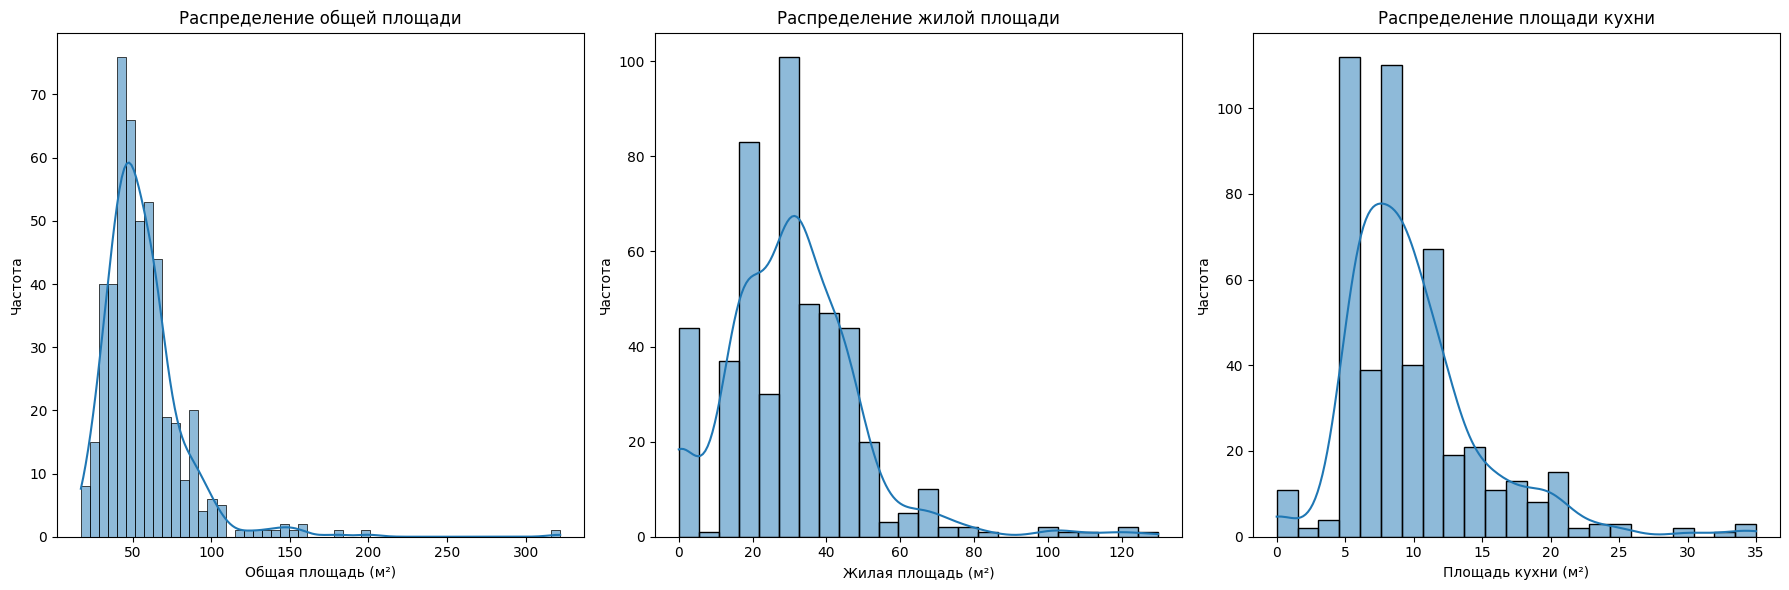

In [138]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.histplot(df['Общая площадь'].dropna(), kde=True, ax=axes[0])
axes[0].set_title('Распределение общей площади')
axes[0].set_xlabel('Общая площадь (м²)')
axes[0].set_ylabel('Частота')

sns.histplot(df['Жилая площадь'].dropna(), kde=True, ax=axes[1])
axes[1].set_title('Распределение жилой площади')
axes[1].set_xlabel('Жилая площадь (м²)')
axes[1].set_ylabel('Частота')

sns.histplot(df['Площадь кухни'].dropna(), kde=True, ax=axes[2])
axes[2].set_title('Распределение площади кухни')
axes[2].set_xlabel('Площадь кухни (м²)')
axes[2].set_ylabel('Частота')

plt.tight_layout()
plt.show()

Так же посмотрим на информацию о ценах на квартиры и построим график

In [139]:
print(df['Цена, р.'].describe())

count    4.860000e+02
mean     4.806847e+06
std      2.795811e+06
min      5.000000e+05
25%      3.342500e+06
50%      4.222800e+06
75%      5.567500e+06
max      4.300000e+07
Name: Цена, р., dtype: float64


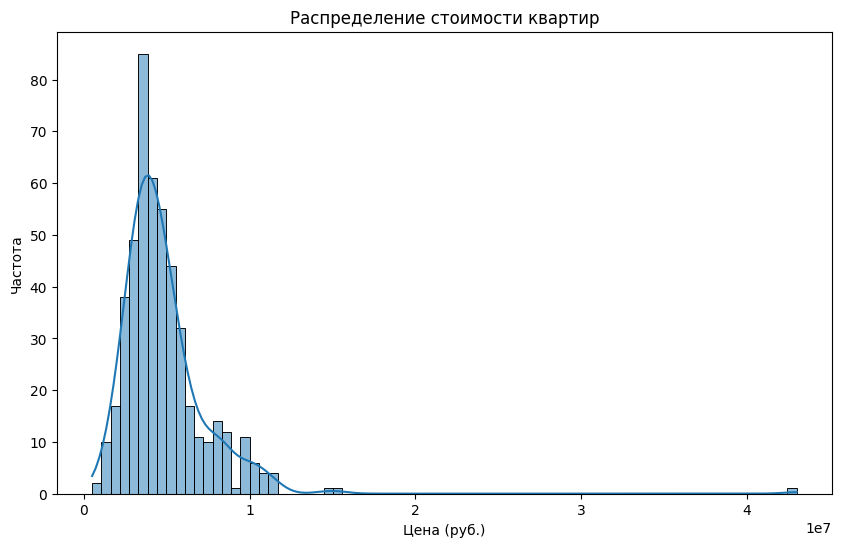

In [140]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Цена, р.'].dropna(), kde=True)
plt.title('Распределение стоимости квартир')
plt.xlabel('Цена (руб.)')
plt.ylabel('Частота')
plt.show()